In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston

In [2]:
boston_df = pd.DataFrame(load_boston()['data'], columns = load_boston()['feature_names'])
boston_df['MEDV'] = load_boston()['target']
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


# a) [0.5pts] Make a scatterplot between MEDV and LSTAT

In [3]:
plt.rcParams["figure.figsize"] = (10,10)

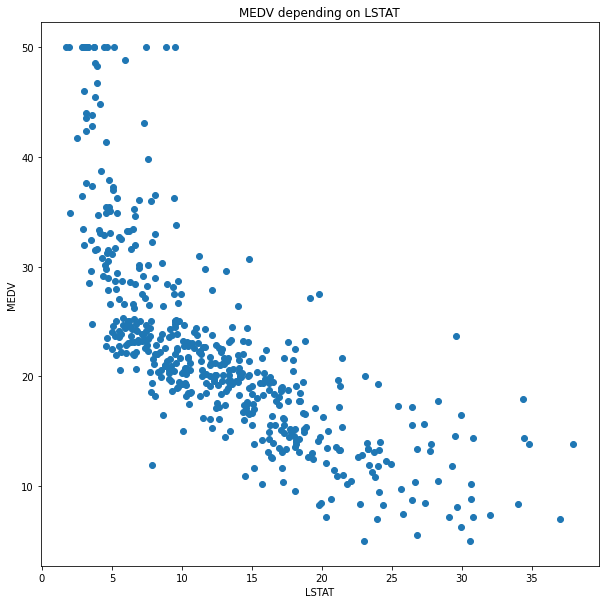

In [4]:
plt.scatter(boston_df.LSTAT, boston_df.MEDV)
plt.xlabel("LSTAT")
plt.ylabel("MEDV")
plt.title("MEDV depending on LSTAT")
plt.show()

# b) [3.5pts] Fit a Polynomial Curveto model MEDV with respect to LSTAT. In order to complete this task:

### a. Divide your data (80%) into train and test set (20%).

In [5]:
boston_train, boston_test = train_test_split(boston_df, train_size = .80)

### b. Make a comparison plot of the root-mean-square error in the training set and test set with different values for the polynomial order.Which is the most appropriate value of the polynomial order.

In [6]:
def predict(x, w):
    """
    Docstring
    
    Input
    x: a vector including all the values of the input variable x for a given set of point, i.e- values for we want to predict the value on 
    the y.axis
    
    w:polynomial coefficient vector. Obtained from function fit
    
    Output:
    List of y-axis points predicted from the x-values, they are in order so the x in index 1 its prediction is also in index one
    of the obtained list
    """
    
    m = len(w)
    
    #This part represents the first summation showed in section 2
    predictions = [sum([w[i] * np.power(j, i) for i in range(m)])[0] for j in x]
    
    return np.array(predictions)

def fit(x, t, M):
    """
    Docstring
    
    Input:
    x: a vector including all the values of the input variable x for a given set of point.
    t: a vector including all the values of the target variable t for a given set of point.
    M: the degree of the polynomial to be fitted.
    
    Output:
    polynomial coefficient vector for the M degree polynomial.
    """
    n = len(x)
    
    #Here we obtain the matrix that contains the x in summation
    A_matrix = np.array([[sum(np.power(x, i+j)) for i in range(M+1)] for j in range(M+1)])
    
    #here we obtain the vector which contains t
    B_matrix = np.array([ [sum(t * np.power(x, i))] for i in range(M+1)])
    
    #here we obtain the inverse of A
    A_inversed = np.linalg.inv(A_matrix)
    
    #Return the matrix multiplication of A^-1 x B
    return np.matmul(A_inversed, B_matrix)

def rmse(y, t):
    """
    Docstring
    
    Input:
    y: a vector including all the predicted values of the target variable for a given set of point.
    t: a vector including all the values of the target variable t for a given set of point.
    
    Output:
    The root.mean square error
    """
    N = len(y)
    
    #computing the error for each data point
    error = np.power(y - t, 2)
    
    #computing the sumation divided by N
    rmse_fun = sum(error)/N
    
    #applying root square
    rmse_fun = np.sqrt(rmse_fun)
    return round(rmse_fun,5)

In [7]:
boston_train_LSTAT = np.array(boston_train.LSTAT)
boston_train_MEDV = np.array(boston_train.MEDV)

boston_test_LSTAT = np.array(boston_test.LSTAT)
boston_test_MEDV = np.array(boston_test.MEDV)

rmse_train = []

rmse_test = []

for i in range(10):
    #obtaining the model in the i polynomial and its rmse
    
    w_i = fit(boston_train_LSTAT, boston_train_MEDV, i)
    predicted_i = predict(boston_train_LSTAT, w_i)
    rmse_tra = rmse(boston_train_MEDV, predicted_i)
    
    #testing the test data in the model and getting the rmse
    predicted_test = predict(boston_test_LSTAT, w_i)
    rmse_te = rmse(boston_test_MEDV, predicted_test)
    rmse_train.append(rmse_tra)
    rmse_test.append(rmse_te)

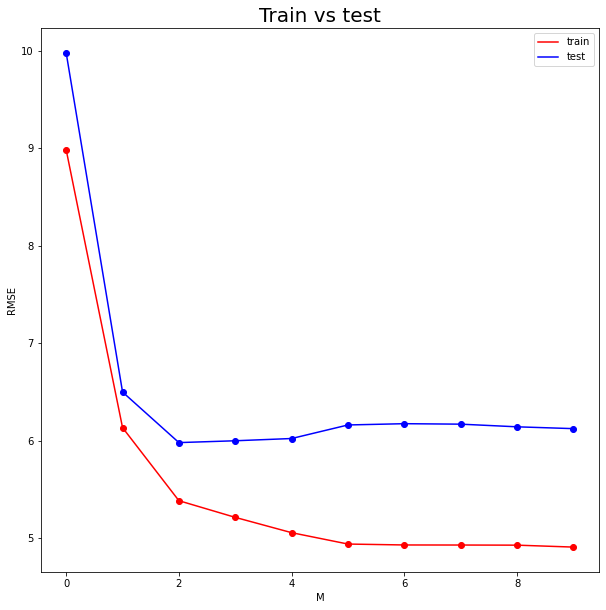

In [8]:
#PLotting Train rmse vs test rmse
x_axis = [i for i in range(10)]

plt.plot(x_axis, rmse_train, color = 'red', label = 'train')
plt.scatter(x_axis, rmse_train, color = 'red')
plt.plot(x_axis, rmse_test, color = 'blue', label = 'test')
plt.scatter(x_axis, rmse_test, color = 'blue')
plt.title("Train vs test", fontsize = 20)
plt.xlabel("M")
plt.ylabel("RMSE")
plt.legend()
plt.show()

I would choose when M = 3 because of the scatter plot is easy to see how the values goes down and mostM equal to an even number goes up again and the others odd M suddenly goes to 0

### c. The mean percentage error is a metric that can be helpful to understand if your model  is  over  overestimating  or  underestimating  the  real  value. This  can  be computed as follows:

In [9]:
def MPE(y_real, y_predicted):
    """
    Dosctring
    Function to compute the Mean Percentage Error only accepts numpy arrays
    
    input 
    y_real: real values of the predicted variable
    y_predicted: predicted values of the predicted variable
    
    output
    return the Mean precentage error on percentages without %
    
    """
    n = len(y_real)
    
    mpe = (100 * round((1/n) * sum(abs((y_real- y_predicted)/y_real)), 5))
    
    return mpe

#### M = 3, polynomial of degree 3

In [10]:
boston_train_LSTAT_2 = np.array(boston_train.LSTAT)
boston_train_MEDV_2 = np.array(boston_train.MEDV)

w_2 = fit(boston_train_LSTAT_2, boston_train_MEDV_2, 3)
predicted_2 = predict(boston_train_LSTAT_2, w_2)
rmse_2 = rmse(boston_train_MEDV_2, predicted_2)

mpe_2 = MPE(boston_train_MEDV_2, predicted_2)

print(mpe_2)

19.464000000000002


I would say my model is neither underfitting nor overfitting

### d. Make a scatterplot between MEDV and LSTAT including the predicted curved and the metrics (RMSE and MPE).

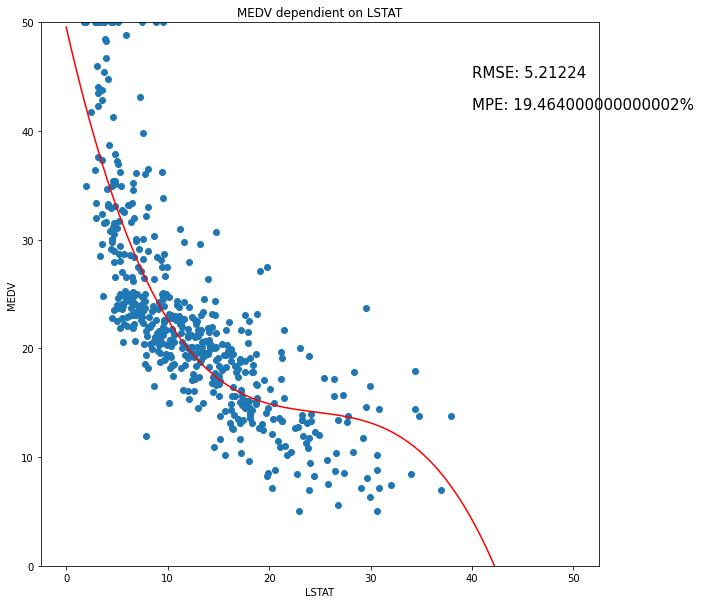

In [11]:
x_axis = np.linspace(0, 50, 500)

y_axis = predict(x_axis, w_2)

plt.plot(x_axis, y_axis, color = 'red')
plt.scatter(boston_df.LSTAT, boston_df.MEDV)
plt.xlabel("LSTAT")
plt.ylabel("MEDV")
plt.title("MEDV dependient on LSTAT")
plt.text(40,45 , "RMSE: " + str(rmse_2), fontsize = 15)
plt.text(40,42 , "MPE: " + str(mpe_2) + "%", fontsize = 15)
plt.ylim([0, 50])
plt.show()